# Pendeteksi penyakit paru-paru menggunakan Deep-Multi-Layered CNN

#### Dataset

(Google Drive)
> https://drive.google.com/drive/folders/1oAJUw2UChrYMqUwLB8F-4RuX19WoeqsN?usp=sharing

(covid-chestxray-dataset)
> https://github.com/ieee8023/covid-chestxray-dataset


(Actualmed-COVID-chestxray-dataset)
> https://github.com/agchung/Actualmed-COVID-chestxray-dataset

(Kaggle Chest X-Ray Images (Pneumonia))
> https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

##### Penggunaan Library 

###### Library yang digunakan pada project ini sebagai berikut:
###### 1. tensorflow : untuk penggunaan deep learning
###### 2. glob : untuk penggunaan array
###### 3. numpy : untuk membuat objek kelas array tunggal dan multidimensi
###### 4. pandas : untuk mengatur tata letak data supaya mudah dicari
###### 5. tqdm : untuk menampilkan progress bar dengan perulangan yang sederhana
###### 6. opencv : untuk preprocessing data gambar 
###### 7. matplotlib : untuk visualisasi data
###### 8. scikitlearn-labelEncoder : untuk pre-processing dalam penamaan label setiap data
###### 9. scikitlearn-train_test_split : untuk pre-processing dalam pembagian data training dan testing
###### 10. keras : untuk penggunaan model deep learning

In [2]:
## Library that we used
import tensorflow as tf
import glob 
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.layers import BatchNormalization, Flatten, Input, concatenate
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.models import load_model
from keras.layers.core import Activation, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Model
from joblib import dump
import seaborn as sns
le = LabelEncoder()

##### Directory local dataset

In [ ]:
# Actumed Dir Local Jessica
path = "F:\Backup Data\KULIAH KELAS\SEMESTER 6\9. Pengolahan Citra\Project Akhir\Actualmed-COVID-chestxray-dataset-master-20220416T062843Z-001\Actualmed-COVID-chestxray-dataset-master"

# Kaggle Dir Local Jessica
path2 = "F:\Backup Data\KULIAH KELAS\SEMESTER 6\9. Pengolahan Citra\Project Akhir\kaggle-20220416T062842Z-001\kaggle"

# Kaggle Covid Dir Jessica
path3 = "F:\Backup Data\KULIAH KELAS\SEMESTER 6\9. Pengolahan Citra\Project Akhir\Kaggle Radiography"

In [3]:
# Actuamed Dir Local ALbert
path = "C:\\Users\\alber\\Desktop\\Semester 6\\Pengolahan Citra Digital\\Python\Actualmed-COVID-chestxray-dataset-master"

# Kaggle (Normal and Pneumonia) Dir Albert
path2 = "C:\\Users\\alber\\Desktop\\Semester 6\\Pengolahan Citra Digital\\Python\kaggle"

# Kaggle (Covid and Normal) Dir Albert
path3 = "C:\\Users\\alber\\Desktop\\Semester 6\\Pengolahan Citra Digital\\Python\\Kaggle Radiography"

#### Pemberian label 

###### Label pada data kaggle untuk Normal dan Pneumonia

In [6]:
## Label for Kaggle (Normal and Pneumonia) Dataset
class_label_kaggle = ["NORMAL","PNEUMONIA"]
class_names_label = {class_label_kaggle:i for i, class_label_kaggle in enumerate(class_label_kaggle)}
# class_labelname_kaggle = le.transform(class_label_kaggle)

if(class_names_label["NORMAL"]!=1 and class_names_label["PNEUMONIA"]!=2):
    class_names_label["NORMAL"] = 1
    class_names_label["PNEUMONIA"] = 2

class_names_label

{'NORMAL': 1, 'PNEUMONIA': 2}

###### Label pada data kaggle untuk COVID dan Normal

In [8]:
def labelling_kaggle(class_names_label,path,dataset_image,dataset_label,size):
    print("Loading {}".format(path))
    for folder in os.listdir(path):
        label = class_names_label[folder]
        print(folder)
        for file in tqdm(os.listdir(os.path.join(path, folder))):
            img_path = os.path.join(os.path.join(path, folder), file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (size, size))
            dataset_image.append(image)
            dataset_label.append(label)
    dataset_image = np.array(dataset_image, dtype = 'float32')
    dataset_label = np.array(dataset_label, dtype = 'int32')

In [9]:
images1 = []
labels1 = []
labelling_kaggle(class_names_label,path2,images1,labels1,128)

Loading C:\Users\alber\Desktop\Semester 6\Pengolahan Citra Digital\Python\kaggle
NORMAL


100%|██████████| 1583/1583 [01:58<00:00, 13.33it/s]


PNEUMONIA


100%|██████████| 4273/4273 [02:29<00:00, 28.54it/s]


In [10]:
os.listdir(path2)

['NORMAL', 'PNEUMONIA']

In [11]:
## Label for Kaggle Radiography Dataset
class_label_kaggle_radiography = ["COVID", "NORMAL"]
le.fit(class_label_kaggle_radiography)
class_names_label_kaggle_radiography = {class_label_kaggle_radiography:i for i, class_label_kaggle_radiography in enumerate(class_label_kaggle_radiography)}

if(class_names_label_kaggle_radiography["COVID"]!=0 and class_names_label_kaggle_radiography["NORMAL"]!=1):
    class_names_label_kaggle_radiography["COVID"] = 0
    class_names_label_kaggle_radiography["NORMAL"] = 1

In [12]:
# Making label for kaggle radiography dataset
images2 = []
labels2 = []
labelling_kaggle(class_names_label_kaggle_radiography,path3,images2,labels2,128)

Loading C:\Users\alber\Desktop\Semester 6\Pengolahan Citra Digital\Python\Kaggle Radiography
COVID


100%|██████████| 3616/3616 [00:28<00:00, 125.07it/s]


NORMAL


100%|██████████| 2616/2616 [00:14<00:00, 181.58it/s]


In [13]:
class_names_label_kaggle_radiography

{'COVID': 0, 'NORMAL': 1}

In [14]:
os.listdir(path3)

['COVID', 'NORMAL']

In [15]:
# Actuamed Dataset
source = np.asarray(pd.read_csv(path + '\\metadata.csv'))

In [16]:
## Dataframe Actuamed
df = pd.DataFrame(source, columns=['patientid',	'offset', 'sex',	'age',	'finding',	
                                   'survival',	'temperature',	'pO2 saturation',	'view',	
                                   'modality',	'imagename','artifacts distortion',	'notes'])
df

,patientid,offset,sex,age,finding,survival,temperature,pO2 saturation,view,modality,imagename,artifacts distortion,notes
0,ANON196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,CR.1.2.840.113564.1722810170.20200313090023421...,NaN,"Inconclusive, date taken (YYYYMMDD): 20200313"
1,ANON196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,CR.1.2.840.113564.1722810170.20200313100318375...,NaN,"Inconclusive, date taken (YYYYMMDD): 20200313"
2,ANON56,NaN,NaN,NaN,No finding,NaN,NaN,NaN,PA,X-ray,CR.1.2.840.113564.1722810170.20200317090830828...,NaN,Negative (covid-19 viral infection is excluded...
3,ANON56,NaN,NaN,NaN,No finding,NaN,NaN,NaN,PA,X-ray,CR.1.2.840.113564.1722810170.20200317104341875...,NaN,Negative (covid-19 viral infection is excluded...
4,ANON196,NaN,NaN,NaN,COVID-19,NaN,NaN,NaN,PA,X-ray,CR.1.2.840.113564.1722810170.20200318082923328...,NaN,", date taken (YYYYMMDD): 20200318"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,ANON33,NaN,NaN,NaN,No finding,NaN,NaN,NaN,PA,X-ray,DX.1.2.840.113564.1722810162.20200420155936364...,NaN,Negative (covid-19 viral infection is excluded...
234,ANON41,NaN,NaN,NaN,No finding,NaN,NaN,NaN,PA,X-ray,DX.1.2.840.113564.1722810162.20200420164750991...,NaN,Negative (covid-19 viral infection is excluded...
235,ANON93,NaN,NaN,NaN,No finding,NaN,NaN,NaN,PA,X-ray,DX.1.2.840.113564.1722810162.20200420190511734...,NaN,Negative (covid-19 viral infection is excluded...
236,ANON59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,DX.1.2.840.113564.1722810162.20200420203606112...,NaN,"Inconclusive, date taken (YYYYMMDD): 20200420"


In [17]:
## Actuamed
data = []
labels = []
for i in source:
  img = cv2.imread(path +'\\images\\'+ i[10])
  img = cv2.resize(img, (128, 128))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  label = i[4]
  data.append(img)
  labels.append(label)
data = np.array(data)
labels = np.array(labels)

In [18]:
## Cek buat dataset actuamed, kalo datanya bersifat Nan artinya pneumonia
a = ['COVID-19', 'No finding']
for i in range(len(labels)): 
  if labels[i] not in a:
    labels[i] = 'pneumonia'

In [19]:
## Encoder label for actualmed
le.fit(labels)
labels = le.transform(labels)

In [20]:
labels

array([2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0,
       2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2])

In [21]:
## Combine the dataset (Actuamed & Kaggle Radiography & Kaggle CXR)
new_label = np.concatenate((labels, labels1, labels2), axis=0)
new_data = np.concatenate((data, images1, images2), axis=0)

In [22]:
## Sebelum d normalisasi
new_data

array([[[[ 21,  21,  21],
         [ 16,  16,  16],
         [ 14,  14,  14],
         ...,
         [ 12,  12,  12],
         [ 12,  12,  12],
         [ 14,  14,  14]],

        [[ 15,  15,  15],
         [ 14,  14,  14],
         [ 12,  12,  12],
         ...,
         [ 12,  12,  12],
         [ 13,  13,  13],
         [ 16,  16,  16]],

        [[ 15,  15,  15],
         [ 15,  15,  15],
         [ 12,  12,  12],
         ...,
         [ 12,  12,  12],
         [ 13,  13,  13],
         [ 15,  15,  15]],

        ...,

        [[  5,   5,   5],
         [  5,   5,   5],
         [  4,   4,   4],
         ...,
         [104, 104, 104],
         [ 85,  85,  85],
         [ 72,  72,  72]],

        [[  5,   5,   5],
         [  6,   6,   6],
         [  5,   5,   5],
         ...,
         [100, 100, 100],
         [ 89,  89,  89],
         [ 66,  66,  66]],

        [[  5,   5,   5],
         [  6,   6,   6],
         [  6,   6,   6],
         ...,
         [115, 115, 115],
        

In [23]:
# dibagi 255 untuk normalisasi
new_data = new_data/255.

In [24]:
## Sesudah di normalisasi
new_label

array([2, 2, 1, ..., 1, 1, 1])

In [25]:
new_data

array([[[[0.08235294, 0.08235294, 0.08235294],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.05490196, 0.05490196, 0.05490196],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.04705882, 0.04705882, 0.04705882],
         [0.05490196, 0.05490196, 0.05490196]],

        [[0.05882353, 0.05882353, 0.05882353],
         [0.05490196, 0.05490196, 0.05490196],
         [0.04705882, 0.04705882, 0.04705882],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.05098039, 0.05098039, 0.05098039],
         [0.0627451 , 0.0627451 , 0.0627451 ]],

        [[0.05882353, 0.05882353, 0.05882353],
         [0.05882353, 0.05882353, 0.05882353],
         [0.04705882, 0.04705882, 0.04705882],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.05098039, 0.05098039, 0.05098039],
         [0.05882353, 0.05882353, 0.05882353]],

        ...,

        [[0.01960784, 0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960784]

In [26]:
new_data.shape

(12326, 128, 128, 3)

In [27]:
new_data = new_data.reshape(len(new_data), 128, 128, 3)

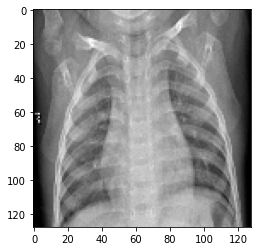

In [28]:
plt.imshow(new_data[1000], cmap = 'gray')

In [29]:
# Check how many data each of the class feature 
# 0 -> covid
# 1 -> normal
# 2 -> pneumonia
print(len(np.where(new_label == 0)[0]))
print(len(np.where(new_label == 1)[0]))
print(len(np.where(new_label == 2)[0]))

3674
4326
4326


#### Deep Learning Model

In [26]:
## Deep Learning Proposed Model
input = Input(shape=(128,128,3))
x = Conv2D(16, (3, 3), input_shape=(128,128,1), activation='relu')(input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output = Dense(3, activation="softmax")(x)
model = Model(inputs=input, outputs=output)

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496 

In [30]:
## Dibikin jadi array
new_label = tf.keras.utils.to_categorical(new_label, num_classes=3)

In [29]:
new_label

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

#### Training dan testing data

In [30]:
x_train, x_test, y_train, y_test = train_test_split(new_data, new_label, test_size=0.2, random_state=1)

In [ ]:
## Continue From Saved Model
loaded_model = load_model("cxr_model2.h5")

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training.log', separator = ',', append = False)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, callbacks=[csv_logger])

Epoch 1/30
309/309 [==============================] - 423s 1s/step - loss: 0.4646 - accuracy: 0.8063 - val_loss: 0.3453 - val_accuracy: 0.8670
Epoch 2/30
309/309 [==============================] - 1329s 4s/step - loss: 0.2715 - accuracy: 0.9014 - val_loss: 0.2320 - val_accuracy: 0.9193
Epoch 3/30
309/309 [==============================] - 379s 1s/step - loss: 0.2184 - accuracy: 0.9224 - val_loss: 0.2259 - val_accuracy: 0.9323
Epoch 4/30
309/309 [==============================] - 369s 1s/step - loss: 0.1694 - accuracy: 0.9402 - val_loss: 0.2035 - val_accuracy: 0.9286
Epoch 5/30
309/309 [==============================] - 391s 1s/step - loss: 0.1500 - accuracy: 0.9448 - val_loss: 0.1758 - val_accuracy: 0.9359
Epoch 6/30
309/309 [==============================] - 416s 1s/step - loss: 0.1182 - accuracy: 0.9561 - val_loss: 0.2177 - val_accuracy: 0.9225
Epoch 7/30
309/309 [==============================] - 412s 1s/step - loss: 0.1027 - accuracy: 0.9630 - val_loss: 0.1757 - val_accuracy: 0.943

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/model/max_pooling2d/MaxPool/MaxPoolGrad' defined at (most recent call last):
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell
      await result
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\alber\AppData\Local\Temp\ipykernel_14364\1972185710.py", line 7, in <cell line: 7>
      history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, callbacks=[csv_logger])
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 863, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 530, in minimize
      grads_and_vars = self._compute_gradients(
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 583, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 464, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/model/max_pooling2d/MaxPool/MaxPoolGrad'
OOM when allocating tensor with shape[32,126,126,16] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node gradient_tape/model/max_pooling2d/MaxPool/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1028]

In [ ]:
model.evaluate(x_test,y_test)

76/76 [==============================] - 12s 151ms/step - loss: 0.4767 - accuracy: 0.9557


[0.4766841232776642, 0.9556752443313599]

In [ ]:
# Print the accuracy of the model
print(classification_report(np.argmax(new_label, axis=-1), np.argmax(model.predict(new_data), axis=-1)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3674
           1       0.99      0.99      0.99      4070
           2       0.99      0.99      0.99      4326

    accuracy                           0.99     12070
   macro avg       0.99      0.99      0.99     12070
weighted avg       0.99      0.99      0.99     12070



In [ ]:
test = data[1].reshape(1, 128, 128, 3)

In [ ]:
model.predict(test)

array([[0., 0., 1.]], dtype=float32)

In [ ]:
np.argmax(model.predict(test), axis=-1)

array([2], dtype=int64)

#### Save dan Load Model

In [ ]:
## Save deep learning model
model.save("cxr_model2.h5")

In [31]:
## Load the model
# loaded_model = load_model("cxr_model.h5")

## Load the model
# loaded_model = load_model("cxr_model1.h5")

## Load the model
loaded_model = load_model("pcdWebsite\cxr_model_cnn_fixed.h5")

In [34]:
loaded_model_vgg16 = load_model("pcdWebsite\cxr_model_vgg16.h5")

In [33]:
# Print the accuracy of the model CNN
print(classification_report(np.argmax(new_label, axis=-1), np.argmax(loaded_model.predict(new_data), axis=-1)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3674
           1       0.99      0.99      0.99      4326
           2       0.99      0.99      0.99      4326

    accuracy                           0.99     12326
   macro avg       0.99      0.99      0.99     12326
weighted avg       0.99      0.99      0.99     12326



In [36]:
# Print the accuracy of the model VGG 16
print(classification_report(np.argmax(new_label, axis=-1), np.argmax(loaded_model_vgg16.predict(new_data), axis=-1)))

In [30]:
loaded_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        1849

In [35]:
## Test the loaded model again
loaded_model.evaluate(x_test,y_test)

78/78 [==============================] - 53s 605ms/step - loss: 0.1681 - accuracy: 0.9870


[0.16813704371452332, 0.9870235323905945]

In [36]:
new_label

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [37]:
new_data

array([[[[0.08235294, 0.08235294, 0.08235294],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.05490196, 0.05490196, 0.05490196],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.04705882, 0.04705882, 0.04705882],
         [0.05490196, 0.05490196, 0.05490196]],

        [[0.05882353, 0.05882353, 0.05882353],
         [0.05490196, 0.05490196, 0.05490196],
         [0.04705882, 0.04705882, 0.04705882],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.05098039, 0.05098039, 0.05098039],
         [0.0627451 , 0.0627451 , 0.0627451 ]],

        [[0.05882353, 0.05882353, 0.05882353],
         [0.05882353, 0.05882353, 0.05882353],
         [0.04705882, 0.04705882, 0.04705882],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.05098039, 0.05098039, 0.05098039],
         [0.05882353, 0.05882353, 0.05882353]],

        ...,

        [[0.01960784, 0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960784]

#### Confusion Matrix

In [38]:
## Predict Label
y_predict = loaded_model.predict(x_test)

## Ground Truth Label
y_true = y_test

In [63]:
## Confusion Matrix

from sklearn.metrics import confusion_matrix

res = confusion_matrix(np.argmax(y_true, axis = 1),np.argmax(y_predict, axis = 1))

In [64]:
res

array([[718,   6,   1],
       [  5, 835,   9],
       [  5,   6, 881]], dtype=int64)

In [124]:
class_label = ["Covid-19", "No Finding", "Pneumonia"]

# Bottom Description of Heatmap refer to accuraction each labels

score = []

for i in range(0, len(class_label)) :
    for j in range(0, len(class_label)):
        temp = res[i][j] / sum(res[i])
        print(temp)
        score.append(temp)

score = np.asarray(score).reshape(3,3)


0.9903448275862069
0.008275862068965517
0.001379310344827586
0.005889281507656066
0.983510011778563
0.01060070671378092
0.005605381165919282
0.006726457399103139
0.9876681614349776


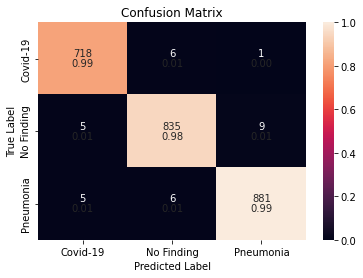

In [167]:
## Heatmap 


plot = plt.axes()
sns.heatmap(res, ax = plot, annot= score, fmt=".2f", annot_kws={'va':'top'}, xticklabels= class_label , yticklabels= class_label, cbar = True, vmin=0, vmax=1)
sns.heatmap(res, ax = plot, annot= True, fmt=".0f", annot_kws={'va':'bottom'}, xticklabels= class_label , yticklabels= class_label, cbar= False).set(xlabel='Predicted Label', ylabel='True Label')
plot.set_title('Confusion Matrix')
plt.show()


In [ ]:
class_label = ["Covid-19", "No Finding", "Pneumonia"]

#### Validation Loss

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN LOSS')
plt.show()

In [ ]:
## For Predict the Image
%matplotlib inline
from google.colab import file
 
uploaded = file.upload()
 
for fn in uploaded.keys():

  path = fn
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (128, 128))

img = img.reshape(1, 128, 128, 3)

print(fn)

plt.imshow(img.reshape(128,128,3))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title(class_label[np.argmax(model.predict(img))])
plt.show()